In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Load data</h1>

In [2]:
file_name = "iris.data.csv"

In [3]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [4]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [11]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)


y_train_1=np.array(y_train_1, dtype=np.float32)
y_test_1=np.array(y_test_1, dtype=np.float32)
x_train_1 = pd.DataFrame.to_numpy(x_train_1, dtype=np.float32)
x_test_1 = pd.DataFrame.to_numpy(x_test_1, dtype=np.float32)

Index(['petal_length', 'petal_width'], dtype='object')
species
(45, 1)


<h2>Define hyper-parameters</h2>

In [6]:
epochs=100
lr=0.01

<h2>Define Placeholder and Variables</h2>

In [7]:
inputs = tf.keras.Input(shape=(2,))
x1 = tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)(inputs)
outputs = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x1)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['mse', 'accuracy'])

<h2>Define update rule and accuracy</h2>

In [8]:
history = model.fit(x_train_1, y_train_1, batch_size=5, epochs=epochs)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.7644 - mse: 0.2855 - accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7514 - mse: 0.2791 - accuracy: 0.0095
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7401 - mse: 0.2734 - accuracy: 0.1333
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7302 - mse: 0.2685 - accuracy: 0.3143
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7215 - mse: 0.2641 - accuracy: 0.4667
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7134 - mse: 0.2600 - accuracy: 0.6381
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7066 - mse: 0.2566 - accuracy: 0.6571
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6999 - mse: 0.2532 - accuracy: 0.6571
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6945 - mse: 0.250

<h2>Execute training</h2>

In [13]:
acc = model.evaluate(x_test_1, y_test_1,batch_size=45)

1/1 [==============================] - 0s 18ms/step - loss: 0.3200 - mse: 0.0818 - accuracy: 1.0000


<h2>Plot</h2>

dict_keys(['loss', 'mse', 'accuracy'])


Text(0.5, 0, 'epoch')

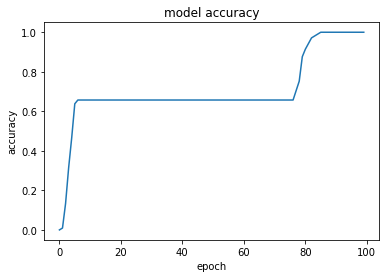

In [14]:
print(history.history.keys())
plt.plot(history.history["accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

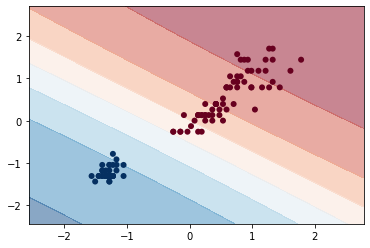

In [15]:

def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

plot_decision_boundary(x_train_1, y_train_1, model, cmap='RdBu')

<h1>Part b:</h1>

In [38]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

y_train_2=np.array(y_train_2, dtype=np.float32)
y_test_2=np.array(y_test_2, dtype=np.float32)
x_train_2 = pd.DataFrame.to_numpy(x_train_2, dtype=np.float32)
x_test_2 = pd.DataFrame.to_numpy(x_test_2, dtype=np.float32)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameter</h2>

In [39]:
epochs=100
lr=0.01

<h2>Define Placeholder and Variables</h2>

In [40]:
inputs = tf.keras.Input(shape=(2,))
x1 = tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)(inputs)
outputs = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x1)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['mse', 'accuracy'])

<h2>Define update rule and accuracy</h2>

In [41]:
history = model.fit(x_train_2, y_train_2, batch_size=5, epochs=epochs)

Epoch 1/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7839 - mse: 0.2947 - accuracy: 0.3714
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.7645 - mse: 0.2854 - accuracy: 0.3714
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7474 - mse: 0.2770 - accuracy: 0.3714
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.7315 - mse: 0.2691 - accuracy: 0.2667
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.7174 - mse: 0.2621 - accuracy: 0.1619
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.7046 - mse: 0.2557 - accuracy: 0.1524
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6929 - mse: 0.2499 - accuracy: 0.6000
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6820 - mse: 0.2444 - accuracy: 0.6286
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6720 - mse: 0.2395 - 

<h2>Execute training</h2>

<h2>Plot</h2>

In [44]:
acc = model.evaluate(x_test_2, y_test_2)

2/2 [==============================] - 0s 5ms/step - loss: 0.3429 - mse: 0.0973 - accuracy: 0.9556


dict_keys(['loss', 'mse', 'accuracy'])


Text(0.5, 0, 'epoch')

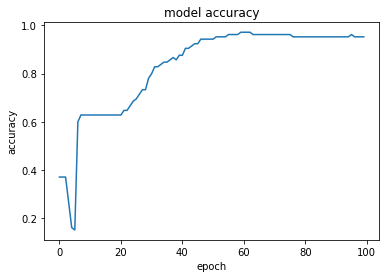

In [45]:
print(history.history.keys())
plt.plot(history.history["accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

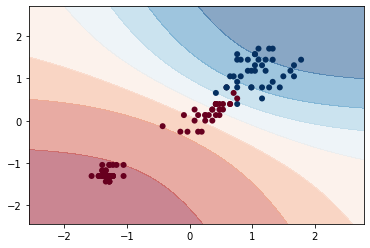

In [46]:
plot_decision_boundary(x_train_2, y_train_2, model, cmap='RdBu')

<h1>Part c:</h1>

In [52]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

y_train_3=np.array(y_train_3, dtype=np.float32)
y_test_3=np.array(y_test_3, dtype=np.float32)
x_train_3 = pd.DataFrame.to_numpy(x_train_3, dtype=np.float32)
x_test_3 = pd.DataFrame.to_numpy(x_test_3, dtype=np.float32)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


<h2>Define hyper-parameters</h2>

In [ ]:
epochs=100
lr=0.01

<h2>Define placehoder and variables</h2>

In [57]:
inputs = tf.keras.Input(shape=(4,))
x1 = tf.keras.layers.Dense(256, activation=tf.nn.relu)(inputs)
x2 = tf.keras.layers.Dense(128, activation=tf.nn.relu)(x1)
outputs = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(x2)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['mse', 'accuracy'])

<h2>Define the neural network</h2>

<h2>Define cost function and accuracy</h2>

In [58]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['mse', 'accuracy'])

<h2>Execute training</h2>

In [59]:
history = model.fit(x_train_3, y_train_3, batch_size=5, epochs=epochs)

Epoch 1/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6641 - mse: 0.2349 - accuracy: 0.0476
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6224 - mse: 0.2162 - accuracy: 0.3619
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5850 - mse: 0.1992 - accuracy: 0.8762
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5508 - mse: 0.1836 - accuracy: 0.8571
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5200 - mse: 0.1696 - accuracy: 0.8286
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4914 - mse: 0.1570 - accuracy: 0.8381
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4650 - mse: 0.1458 - accuracy: 0.8286
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4404 - mse: 0.1357 - accuracy: 0.8095
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4181 - mse: 0.1269 - 

<h2>Plot</h2>

dict_keys(['loss', 'mse', 'accuracy'])


Text(0.5, 0, 'epoch')

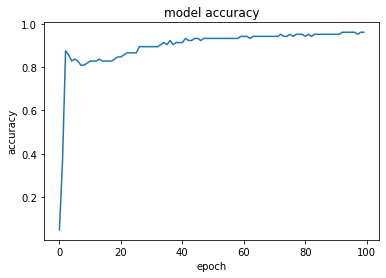

In [60]:
print(history.history.keys())
plt.plot(history.history["accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')